<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practised them yet). In this project we'll review _train/test split_ validation that is a fundamental method for avoiding overfitting. 

The idea is similar to 'cross-validation' — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

We will cover Linear Regression and Knn in this project, with an Enrichment section at the end:
<a id="home"></a>
1. [Linear Regression - Ames housing data](#lin-reg)
2. [Optional: Knn - iris data set](#knn)
3. [Optional: Enrichment](#enrichment)

#### [Home](#home)

<a id="lin-reg"></a>
# <font style='color: green'>1) Linear Regression Use Case</font>

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Ames housing data by picking three different subsets of variables. (You could also fit one or more polynomial models, or any other model you'd like, but we haven't covered them.) 

### Here's What We Will Be Doing:

* Working with Ames housing data to predict the value of a home.
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

In this given task, you will be asked to model the median home price of various houses in Iowa (the Ames housing data set we have come across before). This is a probable use case: we are predicting a continuous, numeric output (price) based on a combination of discrete features.

Reminder of the dataset: [Ames house price data on Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### Data dictionary (taken from Kaggle)

+ SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
+ MSSubClass: The building class
+ MSZoning: The general zoning classification
+ LotFrontage: Linear feet of street connected to property
+ LotArea: Lot size in square feet
+ Street: Type of road access
+ Alley: Type of alley access
+ LotShape: General shape of property
+ LandContour: Flatness of the property
+ Utilities: Type of utilities available
+ LotConfig: Lot configuration
+ LandSlope: Slope of property
+ Neighborhood: Physical locations within Ames city limits
+ Condition1: Proximity to main road or railroad
+ Condition2: Proximity to main road or railroad (if a second is present)
+ BldgType: Type of dwelling
+ HouseStyle: Style of dwelling
+ OverallQual: Overall material and finish quality
+ OverallCond: Overall condition rating
+ YearBuilt: Original construction date
+ YearRemodAdd: Remodel date
+ RoofStyle: Type of roof
+ RoofMatl: Roof material
+ Exterior1st: Exterior covering on house
+ Exterior2nd: Exterior covering on house (if more than one material)
+ MasVnrType: Masonry veneer type
+ MasVnrArea: Masonry veneer area in square feet
+ ExterQual: Exterior material quality
+ ExterCond: Present condition of the material on the exterior
+ Foundation: Type of foundation
+ BsmtQual: Height of the basement
+ BsmtCond: General condition of the basement
+ BsmtExposure: Walkout or garden level basement walls
+ BsmtFinType1: Quality of basement finished area
+ BsmtFinSF1: Type 1 finished square feet
+ BsmtFinType2: Quality of second finished area (if present)
+ BsmtFinSF2: Type 2 finished square feet
+ BsmtUnfSF: Unfinished square feet of basement area
+ TotalBsmtSF: Total square feet of basement area
+ Heating: Type of heating
+ HeatingQC: Heating quality and condition
+ CentralAir: Central air conditioning
+ Electrical: Electrical system
+ 1stFlrSF: First Floor square feet
+ 2ndFlrSF: Second floor square feet
+ LowQualFinSF: Low quality finished square feet (all floors)
+ GrLivArea: Above grade (ground) living area square feet
+ BsmtFullBath: Basement full bathrooms
+ BsmtHalfBath: Basement half bathrooms
+ FullBath: Full bathrooms above grade
+ HalfBath: Half baths above grade
+ Bedroom: Number of bedrooms above basement level
+ Kitchen: Number of kitchens
+ KitchenQual: Kitchen quality
+ TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
+ Functional: Home functionality rating
+ Fireplaces: Number of fireplaces
+ FireplaceQu: Fireplace quality
+ GarageType: Garage location
+ GarageYrBlt: Year garage was built
+ GarageFinish: Interior finish of the garage
+ GarageCars: Size of garage in car capacity
+ GarageArea: Size of garage in square feet
+ GarageQual: Garage quality
+ GarageCond: Garage condition
+ PavedDrive: Paved driveway
+ WoodDeckSF: Wood deck area in square feet
+ OpenPorchSF: Open porch area in square feet
+ EnclosedPorch: Enclosed porch area in square feet
+ 3SsnPorch: Three season porch area in square feet
+ ScreenPorch: Screen porch area in square feet
+ PoolArea: Pool area in square feet
+ PoolQC: Pool quality
+ Fence: Fence quality
+ MiscFeature: Miscellaneous feature not covered in other categories
+ MiscVal: $Value of miscellaneous feature
+ MoSold: Month Sold
+ YrSold: Year Sold
+ SaleType: Type of sale
+ SaleCondition: Condition of sale

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
# Import the libraries and data we'll need, and set up our feature matrix (Xs) and response vector (y)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

houses = pd.read_csv('data/iowa_houses.csv')

# create feature matrix (X)
feature_cols = houses.columns.drop(['SalePrice'])
X = houses[feature_cols]

# create response vector (y)
y = houses.SalePrice


### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [4]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

# Remember to handle null cells and columns with non-numeric data in them. Document the decisions you have made and
# why you have made them.


In [5]:
houses.isnull().sum() #check number of missing data

Neighborhood       0
LotArea            0
MSZoning           0
HouseStyle         0
LotFrontage      259
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
SalePrice          0
dtype: int64

In [6]:
houses.index #index

RangeIndex(start=0, stop=1460, step=1)

In [7]:
houses.dtypes #data types

Neighborhood      object
LotArea            int64
MSZoning          object
HouseStyle        object
LotFrontage      float64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
SalePrice          int64
dtype: object

In [8]:
houses.shape #shape

(1460, 27)

In [9]:
houses.info() #summary about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhood   1460 non-null   object 
 1   LotArea        1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   HouseStyle     1460 non-null   object 
 4   LotFrontage    1201 non-null   float64
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

Rows with missing data for garage year built probably don't have garage. Let us examine them.

In [10]:
no_garage_year_data = houses[houses.isnull().GarageYrBlt] #pick data with NaN for GarageYrBlt
no_garage_year_data.GarageArea.sort_values() #sort by area, should be zero if it doesn't have garage

39      0
1011    0
1009    0
976     0
970     0
       ..
393     0
386     0
375     0
636     0
1453    0
Name: GarageArea, Length: 81, dtype: int64

It is clear that those missing garage built year don't have garage. Let us now check LotFrontage.

In [11]:
no_LotFrontage_data = houses[houses.isnull().LotFrontage] #pick data with NaN for LotFrontage
no_LotFrontage_data

,Neighborhood,LotArea,MSZoning,HouseStyle,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
7,NWAmes,10382,RL,2Story,NaN,7,6,1973,1973,1107,...,1,7,2,1973.0,2,484,235,204,228,200000
12,Sawyer,12968,RL,1Story,NaN,5,6,1962,1962,912,...,1,4,0,1962.0,1,352,140,0,0,144000
14,NAmes,10920,RL,1Story,NaN,6,5,1960,1960,1253,...,1,5,1,1960.0,1,352,0,213,176,157000
16,NAmes,11241,RL,1Story,NaN,6,7,1970,1970,1004,...,1,5,1,1970.0,2,480,0,0,0,149000
24,Sawyer,8246,RL,1Story,NaN,5,8,1968,2001,1060,...,1,6,1,1968.0,1,270,406,90,0,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,NWAmes,12546,RL,1Story,NaN,6,7,1981,1981,1440,...,1,7,1,1981.0,2,467,0,0,99,182900
1431,NPkVill,4928,RL,1Story,NaN,6,6,1976,1976,958,...,1,5,0,1976.0,2,440,0,60,0,143750
1441,CollgCr,4426,RM,1Story,NaN,6,5,2004,2004,848,...,1,3,1,2004.0,2,420,149,0,0,149300
1443,BrkSide,8854,RL,1.5Unf,NaN,6,6,1916,1950,952,...,1,4,1,1916.0,1,192,0,98,0,121000


There doesn't seem to be any hint about the missing LotFrontage data, the data we have doesn't help much to tell whether the property is connected to the street or not. How well connected a property to the street is usually proportional to the price. Properties not connected to the street valued lower, it is probably better to exclude them from our data and treat them as separate dataset. The number of properties missing LotFrontage data is rather significant. Let us check the correlation data first.

In [12]:
houses.LotFrontage.sort_values() #sorting data based on LotFrontage (ascending)

232     21.0
837     21.0
235     21.0
1029    21.0
1038    21.0
        ... 
1429     NaN
1431     NaN
1441     NaN
1443     NaN
1446     NaN
Name: LotFrontage, Length: 1460, dtype: float64

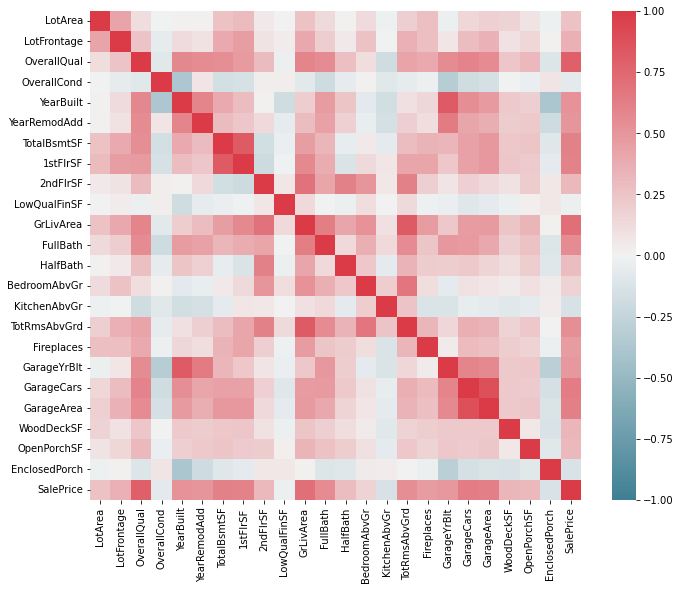

In [21]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(houses.corr(), cmap=cmap, vmin=-1, vmax=1) ;

In [45]:
#we would now check which pairs have above 0.5 correlation. 
c = houses.corr().abs()

sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False))

In [46]:
sol[sol>0.5] #list of correlation pairs above 0.5

GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
GrLivArea     FullBath        0.630012
GarageArea    SalePrice       0.623431
2ndFlrSF      TotRmsAbvGrd    0.616423
TotalBsmtSF   SalePrice       0.613581
2ndFlrSF      HalfBath        0.609707
1stFlrSF      SalePrice       0.605852
OverallQual   GarageCars      0.600671
              GrLivArea       0.593007
YearBuilt     YearRemodAdd    0.592855
GarageYrBlt   GarageCars      0.588920
OverallQual   YearBuilt       0.572323
1stFlrSF      GrLivArea       0.566024
GarageYrBlt   GarageArea      0.564567
OverallQual   GarageArea      0.562022
FullBath      SalePrice       0.560664
              TotRmsAbvGr

We don't see LotFrontage having good correlation with SalePrice here, perhaps we should explore more on the correlation between SalePrice with the variables.

In [53]:
houses[houses.columns[1:]].corr()['SalePrice'][:].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
Fireplaces       0.466929
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BedroomAbvGr     0.168213
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

From here, it looks like OverallQual is the most important factor, followed by GrLivArea, Garage and TotalBsmtSF. We would examine them in more details before we move on the next part.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

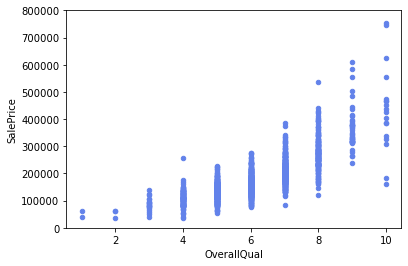

In [57]:
#scatter plot for OverallQual/SalePrice
data = pd.concat([houses['SalePrice'], houses['OverallQual']], axis=1)
data.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0, 800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

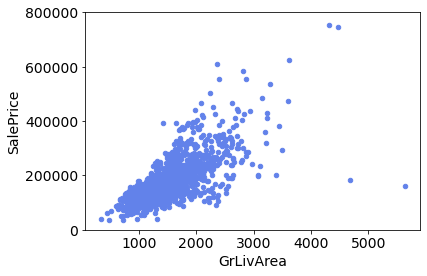

In [69]:
#scatter plot for GrLivArea/SalePrice
data = pd.concat([houses['SalePrice'], houses['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

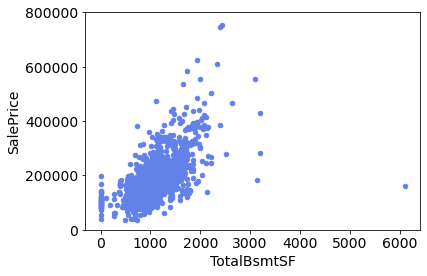

In [70]:
#scatter plot for TotalBsmtSF/SalePrice
data = pd.concat([houses['SalePrice'], houses['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

Although there are some outliers, we can conclude that GrLivArea and TotalBsmtSF seem to be linearly related with SalePrice. The relationship is positive —  as one variable increases, the other also increases. We would now examine how the data change over the years, starting with SalePrice.

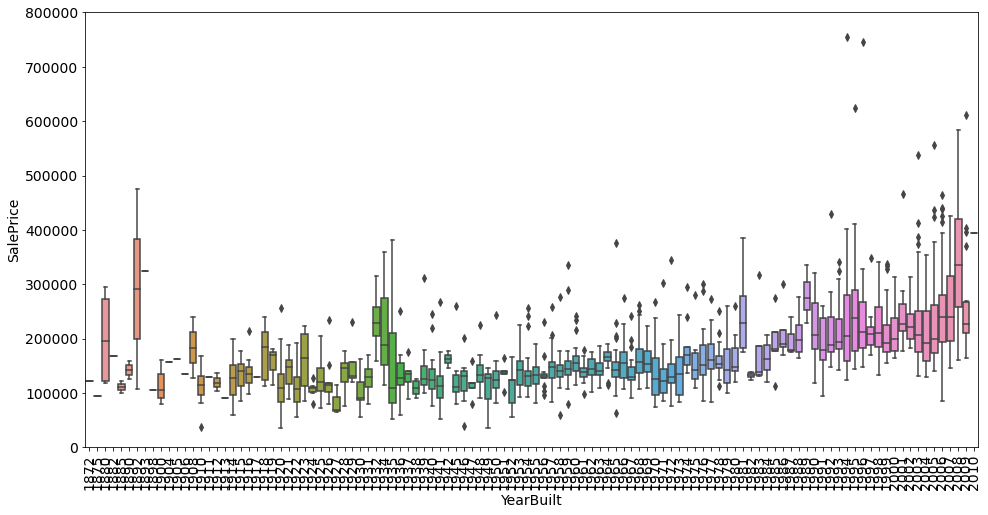

In [71]:
data = pd.concat([houses['SalePrice'], houses['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Price seems to steadily increase over the years with the exeption of very old buildings. However, we should remember that not all of them are of the same size and quality. It might be interesting to examine the change of housing style over the years.

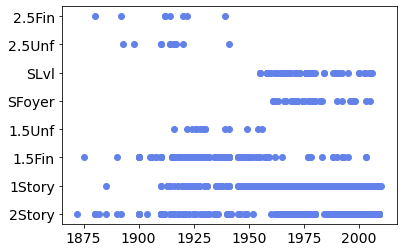

In [72]:
plt.scatter(houses['YearBuilt'], houses['HouseStyle'])

It is interesting to note that SLvl and SFoyer is rather new trend while 2.5s are no longer built around half a century ago and 2Story houses have been around througout the century.

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (e.g. GarageQual, GrLivArea, etc...) that you will use to predict our target variable, SalePrice.
Score and plot your predictions. What do these results tell us?

In [133]:
from sklearn.linear_model import LinearRegression
# Create a list of features.
feature_cols = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
# Create X and y
X = houses[feature_cols]
y = houses.SalePrice
#Instantiate and fit
import sklearn.model_selection
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,y,test_size=1,random_state=0)
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X)
# Print the coefficients.
print(lm.intercept_)
print(lm.coef_)
list(zip(feature_cols, lm.coef_))

-23004.179700273613
[ 70.07092818 103.26829003  53.50118283  -6.55162503]


[('GrLivArea', 70.0709281847478),
 ('GarageArea', 103.26829003338507),
 ('TotalBsmtSF', 53.50118283056246),
 ('1stFlrSF', -6.551625034788647)]

In [134]:
from math import sqrt
import sklearn.metrics
print ('RMSE=',sqrt(sklearn.metrics.mean_squared_error(y, Y_pred)))
m=lm.coef_[0]
b=lm.intercept_
print ('slope=',m,'intercept=',b)

RMSE= 46136.566264129935
slope= 70.0709281847478 intercept= -23004.179700273613


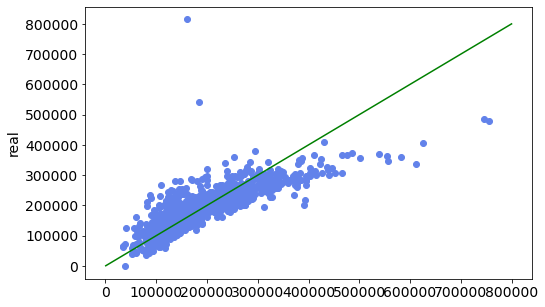

In [135]:
import pylab as pl
pl.figure(figsize=(8,5))
pl.plot(y, Y_pred, 'o')
pl.plot([500,800000],[500,800000], 'g-')
pl.ylabel('predicted')
pl.ylabel('real')
pl.show()

Scatter plot of data vs model. Ideally, the data should been looking more like the green line.

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [142]:
#70/30 split randomly
X3_train,X3_test,Y3_train,Y3_test = sklearn.model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
l3 = LinearRegression()
l3.fit(X3_train, Y3_train)
Y3_pred = l3.predict(X3_test)
# Print the coefficients.
print(l3.intercept_)
print(l3.coef_)
list(zip(feature_cols, l3.coef_))
print ('RMSE=',sqrt(sklearn.metrics.mean_squared_error(Y3_test, Y3_pred)))
m=l3.coef_[0]
b=l3.intercept_
print ('slope=',m,'intercept=',b)

-22822.585321301565
[ 67.35999423 106.97138127  52.44435122  -4.20209028]
RMSE= 41481.52719935973
slope= 67.35999423268095 intercept= -22822.585321301565


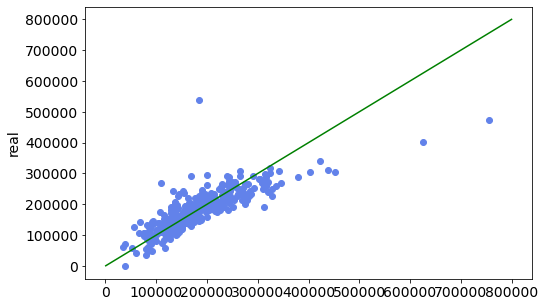

In [143]:
pl.figure(figsize=(8,5))
pl.plot(Y3_test, Y3_pred, 'o')
pl.plot([500,800000],[500,800000], 'g-')
pl.ylabel('predicted')
pl.ylabel('real')
pl.show()

In [144]:
#90/10 split randomly
X1_train,X1_test,Y1_train,Y1_test = sklearn.model_selection.train_test_split(X,y,test_size=0.1,random_state=5)
l1 = LinearRegression()
l1.fit(X1_train, Y1_train)
Y1_pred = l1.predict(X1_test)
# Print the coefficients.
print(l1.intercept_)
print(l1.coef_)
list(zip(feature_cols, l1.coef_))
print ('RMSE=',sqrt(sklearn.metrics.mean_squared_error(Y1_test, Y1_pred)))
m=l1.coef_[0]
b=l1.intercept_
print ('slope=',m,'intercept=',b)

-16031.857413257007
[ 66.04650941 104.23875358  52.01859973  -7.17469136]
RMSE= 45006.08104787779
slope= 66.046509410269 intercept= -16031.857413257007


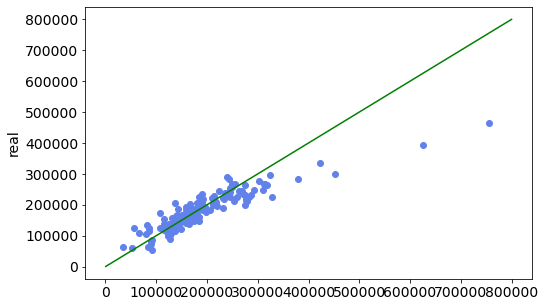

In [145]:
pl.figure(figsize=(8,5))
pl.plot(Y1_test, Y1_pred, 'o')
pl.plot([500,800000],[500,800000], 'g-')
pl.ylabel('predicted')
pl.ylabel('real')
pl.show()

The model works well on lower values but way off at higher values. This is likely because the higher values are outliers or we don't have enough data for higher values.

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [176]:
from sklearn.model_selection import cross_val_score

kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

46995.47990066054
0.6271893119326993


In [177]:
kf = sklearn.model_selection.KFold(n_splits=6, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

46527.09116268665
0.6331683144308484


In [178]:
kf = sklearn.model_selection.KFold(n_splits=7, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))    

46090.90583375347
0.6045358398404395


In [179]:
kf = sklearn.model_selection.KFold(n_splits=8, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

46665.84728643818
0.6279771255244658


In [180]:
kf = sklearn.model_selection.KFold(n_splits=9, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

45805.72225212715
0.6281249313549815


In [183]:
kf = sklearn.model_selection.KFold(n_splits=10, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

46570.76656510886
0.5988610157828974


Because the process is randomized, we get slightly different results each runs. The result we get from higher folds could change rather wildly each runs. This is because  at higher folds we don't have enough data for the model to learn.

Using higher number of folds, we could reduce the bias but increase variance. Also the runtime will increase. It's probably better to stick with 5 fold with the amount of data we have.

#### [Home](#home)

<a id="knn"></a>
# <font style='color: green'>2) Optional: KNN Practise</font>

In [184]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [185]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [186]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [212]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [190]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

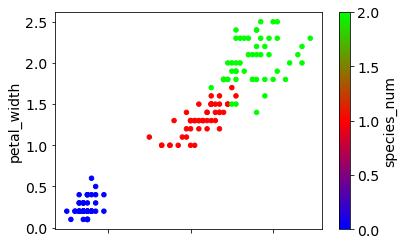

In [192]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

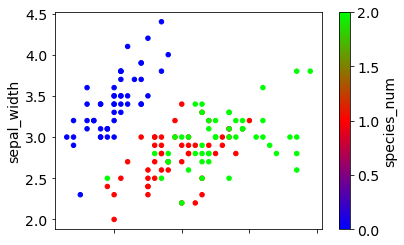

In [193]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [195]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

### Create your target vector "y"
This will be the species type.

In [196]:
y = iris.species

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [202]:
#I'm using 80/20 here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

### Import KNN From `scikit-learn` and Instantiate a Model With One Neighbor

In [203]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [204]:
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9333333333333333


### Create a Model With Five Neighbors. Did it Improve?

In [207]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9333333333333333


No improve observed

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [217]:
# Create a for loop to calculate the TRAINING ERROR and TESTING ERROR for K=1 through 100.
k_range = list(range(1, 120))
training_error = []
testing_error = []
# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:
    # Instantiate the model with the current K value, and fit it with the training data.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy) and append it to the relevant list above.
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error and append it to the relevant list above.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [218]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [219]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
119,0.650000,0.733333
118,0.650000,0.733333
117,0.316667,0.400000
116,0.316667,0.400000
115,0.316667,0.400000


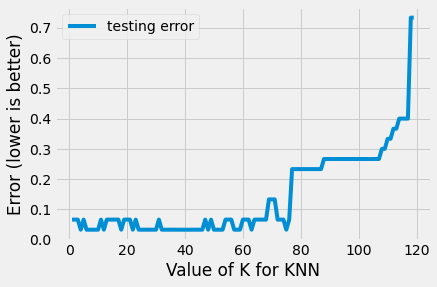

In [220]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [221]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,training error,testing error
K,,
59,0.091667,0.033333
27,0.033333,0.033333
28,0.033333,0.033333
29,0.033333,0.033333
30,0.033333,0.033333


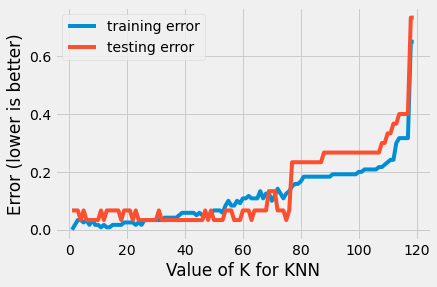

In [222]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

Return probability estimates for the test data X_new.

#### [Home](#home)

<a id="enrichment"></a>
# <font style='color: green'>3) Optional: Enrichment</font>
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [225]:
# First, format our data in a DataFrame

df = pd.read_csv('data/iowa_houses.csv')
df.head()

,Neighborhood,LotArea,MSZoning,HouseStyle,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,CollgCr,8450,RL,2Story,65.0,7,5,2003,2003,856,...,1,8,0,2003.0,2,548,0,61,0,208500
1,Veenker,9600,RL,1Story,80.0,6,8,1976,1976,1262,...,1,6,1,1976.0,2,460,298,0,0,181500
2,CollgCr,11250,RL,2Story,68.0,7,5,2001,2002,920,...,1,6,1,2001.0,2,608,0,42,0,223500
3,Crawfor,9550,RL,2Story,60.0,7,5,1915,1970,756,...,1,7,1,1998.0,3,642,0,35,272,140000
4,NoRidge,14260,RL,2Story,84.0,8,5,2000,2000,1145,...,1,9,1,2000.0,3,836,192,84,0,250000


In [226]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "SalePrice ~ GrLivArea + OverallQual + LotArea - 1", # - 1 = remove intercept
    "case2": "SalePrice ~ GrLivArea + LotFrontage",
    "case3": "SalePrice ~ LotFrontage + OverallQual"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              7785.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:21:59   Log-Likelihood:                         -17805.
No. Observations:                1460   AIC:                                  3.562e+04
Df Residuals:                    1457   BIC:                                  3.563e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      48.0679      3.060     15.707      0.000      42.065      54.071
OverallQual  1.749e+04    758.858     23.051      0.000     1.6e+04     1.9e+04
LotArea         0.6270      0.130      4.834      0.000       0.373       0.881
==============================================================================
Omnibus:                      687.770   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8955.355
Skew:                           1.851   Prob(JB):                         0.00
Kurtosis:                      14.555   Cond. No.                     8.80e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

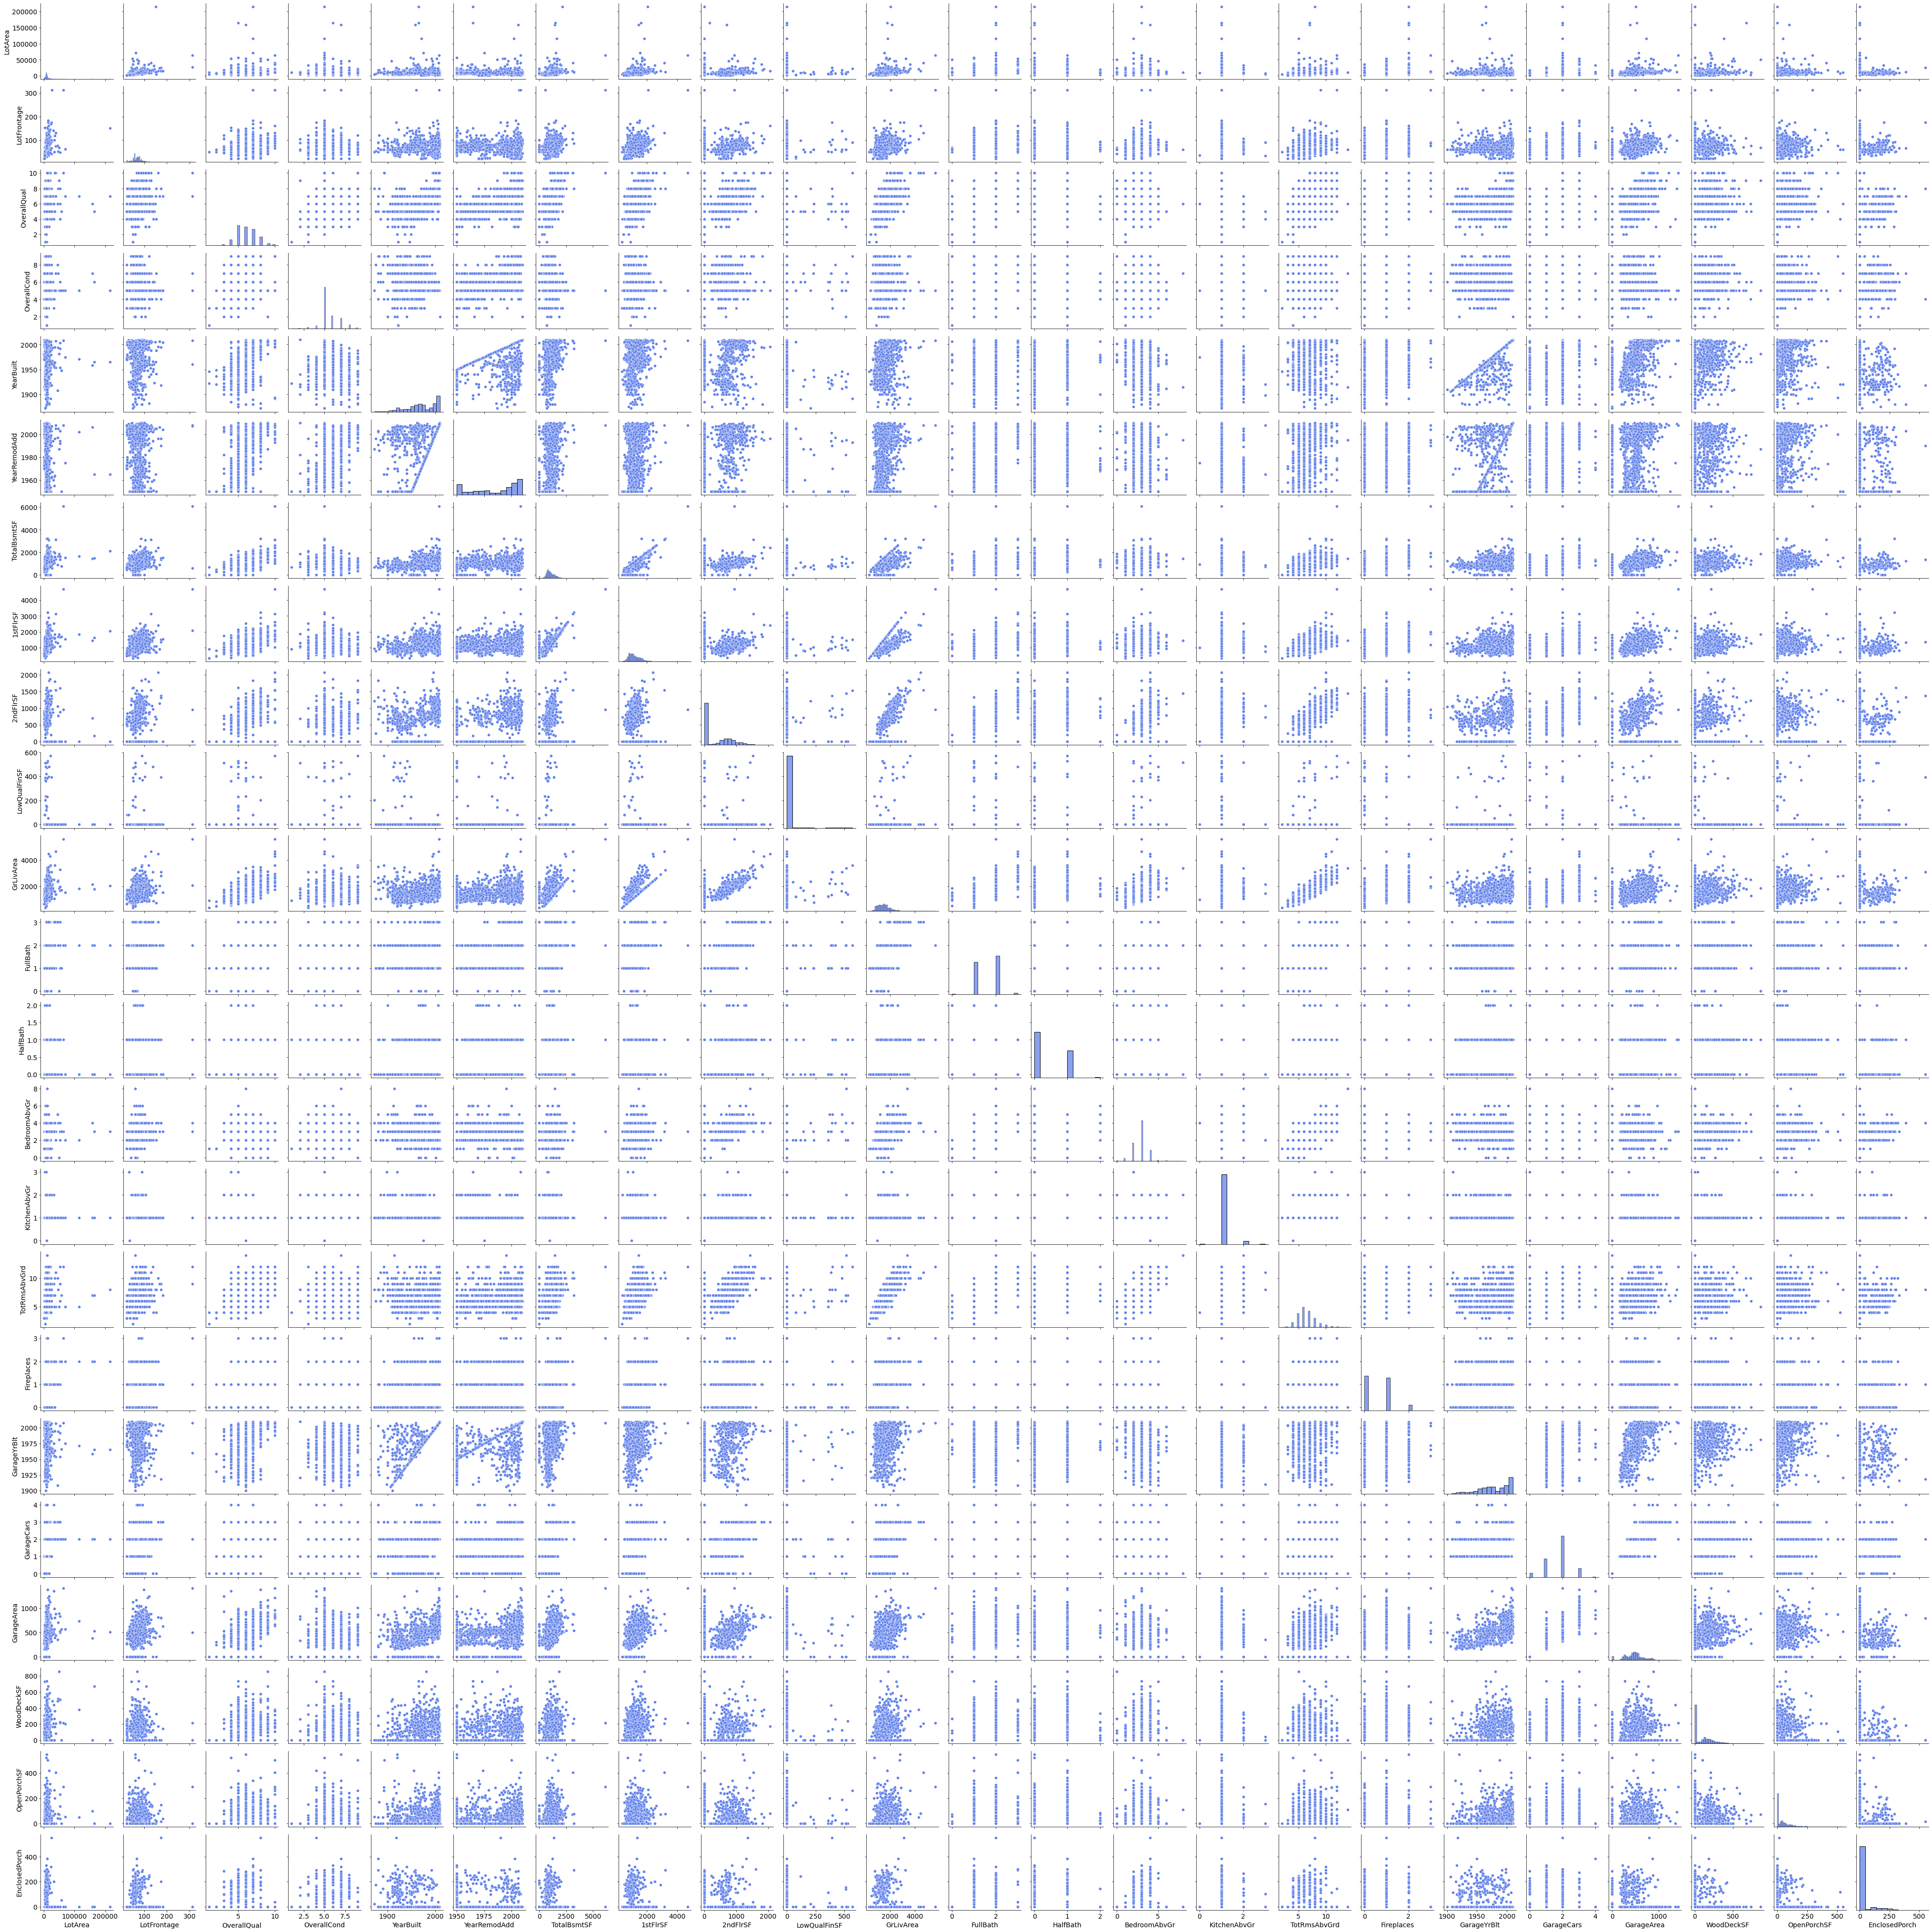

In [64]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [65]:
# Check out Pearson scores


### Bonus Challenge #3 /DEMO: Up for an additional challenge? Try again, this time using the `patsy` library

In [66]:
import patsy

# Add response to the core DataFrame
df['SalePrice'] = y

In [67]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("SalePrice ~ GrLivArea + OverallQual + LotArea", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [68]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.7590836644693246
